# Цель работы
Изучение алгоритмов и методов кластеризации на практике.

# Индивидуальное задание:
Вариант 2

# Результат выполнения работы
Импорт нужных библиотек

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import *

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

import os
os.environ["OMP_NUM_THREADS"] = "3"

Функция для генерации данных

In [2]:
def make_data(n, seed):
    np.random.seed(seed)

    shift_matrix = np.array([[3, 3],
                             [6, 9],
                             [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

Добавление тренировочного и тестового датасета

<Axes: xlabel='x', ylabel='y'>

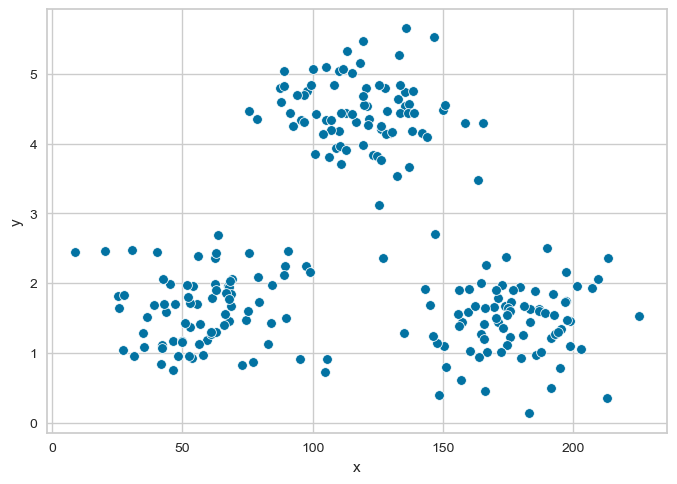

In [3]:
df_train = make_data(80, 0)
sns.scatterplot(x='x', y='y', data=df_train)

<Axes: xlabel='x', ylabel='y'>

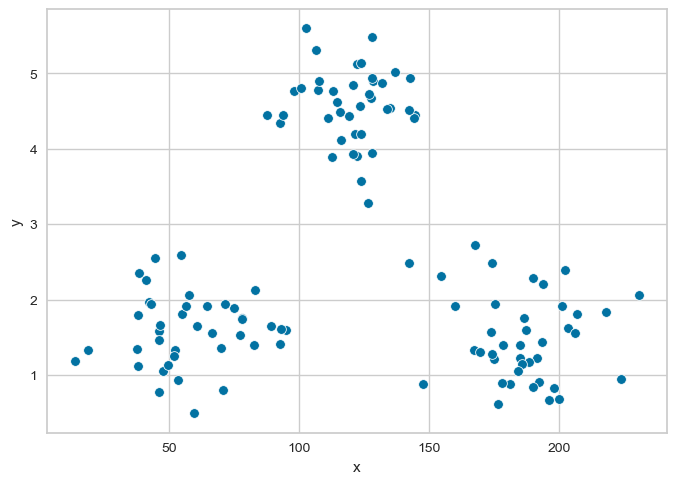

In [4]:
df_test = make_data(40,1)
sns.scatterplot(x='x', y='y', data=df_test)

Функция для отрисовки графиков

In [5]:
def draw(i,txt,X,hue):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hue, palette='viridis', s=100)
    plt.scatter(centers[:, 0], centers[:, 1], 
                c='red', s=300, marker='X', label='Центры кластеров')
    plt.title(f"{i} Кластера. {txt} данные")
    plt.xlabel("Признак x")
    plt.ylabel("Признак y")
    plt.legend()
    plt.show()

Обучим модель кластеризации с помощью алгоритма k-means на обучающем датасете. Проверим модели на тестовых данных и визуализируем полученные результаты. Чтобы лучше видеть все кластеры поменяе их цвет и визуализируем центры.

In [ ]:
scores = []
for i in range(2,5):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(df_train)
    X_test_scaled = scaler.transform(df_test)
    k_means = KMeans(n_clusters=i, random_state=0)
    k_means.fit(X_train_scaled)
    predictions = k_means.predict(X_test_scaled)
    labels = k_means.labels_
    centers = k_means.cluster_centers_
    draw(i,"Тренировочные",X_train_scaled,labels)
    draw(i,"Тестовые",X_test_scaled,predictions)
    scores.append(silhouette_score(X_test_scaled, predictions))

C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_

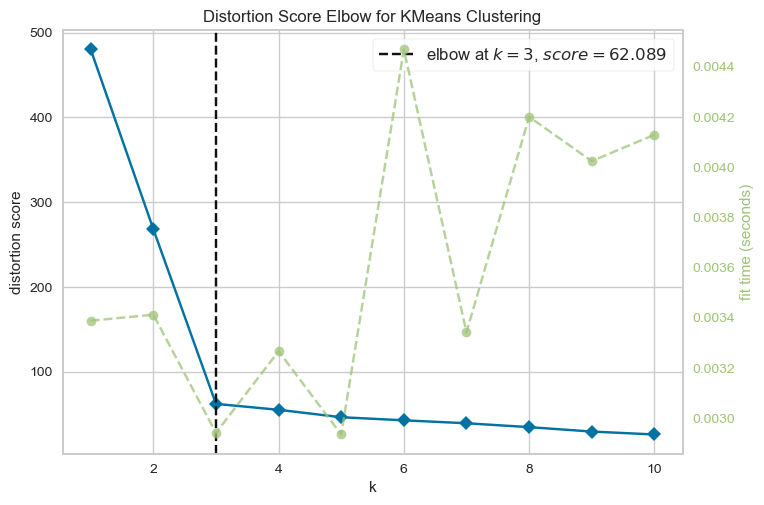

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
visualizer = KElbowVisualizer(k_means, k=(1, 11))
visualizer.fit(X_train_scaled)
visualizer.show()

In [8]:
scores

[0.4830457623430128, 0.7298364973419526, 0.5579537669949807]

Как видно из графика и коэффициенту силуэта, оптимальным кол-ом кластеров является 3 кластера. Об этом свидетельствует "график локтя" т.к. точка излома в этом месте снизила ошибки и увеличение кластеров уже не идёт на пользу.

### Вывод по 1-ой части
Коэффициент силуэта: Значение 0.72 является умеренно высоким и указывает на хорошее качество кластеризации. Объекты внутри кластеров близки друг к другу, а расстояния до других кластеров заметно больше.

## Индивидуальное задание

Загрузка датасета

In [32]:
df = pd.read_csv('2liver.csv')
df

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.50,2
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1


Информация о датасете 2liver.csv 

Содержит информацию о заболеваемости печени:
- Возраст пациента
- Пол пациента
- Общий билирубин
- Прямой билирубин
- Щелочная фосфатаза
- Аламиноаминотрансфераза
- Аспартатаминотрансфераза
- Всего белков
- Альбумин
- Соотношение альбуминов и глобулинов
- Цель: поле, используемое для разделения данных на два набора (пациент с заболеванием печени
или без заболевания).


### Обработка данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   TotalBilirubin              585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset123                  587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Проверка данных

In [11]:
for i in df.columns:
    print(i, sorted(df[i].unique()), end = '\n\n', sep = '\n')

Age
[4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 78, 84, 85, 90]

Gender
['Female', 'Mal', 'Male']

TotalBilirubin
[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4, 4.5, 4.7, 4.9, 5.0, 5.2, 5.3, 5.5, 5.7, 5.8, 5.9, 6.2, 6.3, 6.6, 6.7, 6.8, 7.1, 7.3, 7.4, 7.5, 7.7, 7.9, 8.0, 8.2, 8.6, 8.7, 8.9, 9.4, 10.2, 10.6, 10.9, 11.0, 11.1, 11.3, 11.5, 12.1, 12.7, 14.1, 14.2, 14.5, 14.8, 15.0, 15.2, 15.6, 15.8, 15.9, 16.4, 16.6, 16.7, 17.3, 17.7, 18.0, 18.4, 18.5, 19.6, 19.8, 20.0, 20.2, 22.5, 22.6, 22.7, 22.8, 23.0, 23.2, 23.3, 25.0, 26.3, 27.2, 27.7, 30.5, 30.8, 32.6, 42.8, 75.0, nan]

Direct_Bilirubin
[0.1, 0.2, 0.3, 0.4, 0.5, 

Произведена замена названий колонок, проведён Label encoding (0 - Женщина, 1 - Мужчина). Исправлены все некорректные названия. Удалены явные дубликаты

In [12]:
df = df.rename(columns={'Dataset123': 'Bool'})
df = df.dropna()
df.loc[:, 'Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4','34')
df.loc[:, 'Bool'] = df['Bool'].replace('yes','1')
df.loc[:, 'Gender'] = df['Gender'].replace('Female','0').replace('Male','1').replace('Mal','1')
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype('float')
df = df.drop_duplicates().reset_index(drop = True) 

In [13]:
df.head(5)

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


Разделение на признаки, выделение целевой переменной

In [14]:
X = df.drop(columns=['Bool']) 
y = df['Bool']

Матрица диаграмм рассеяния 

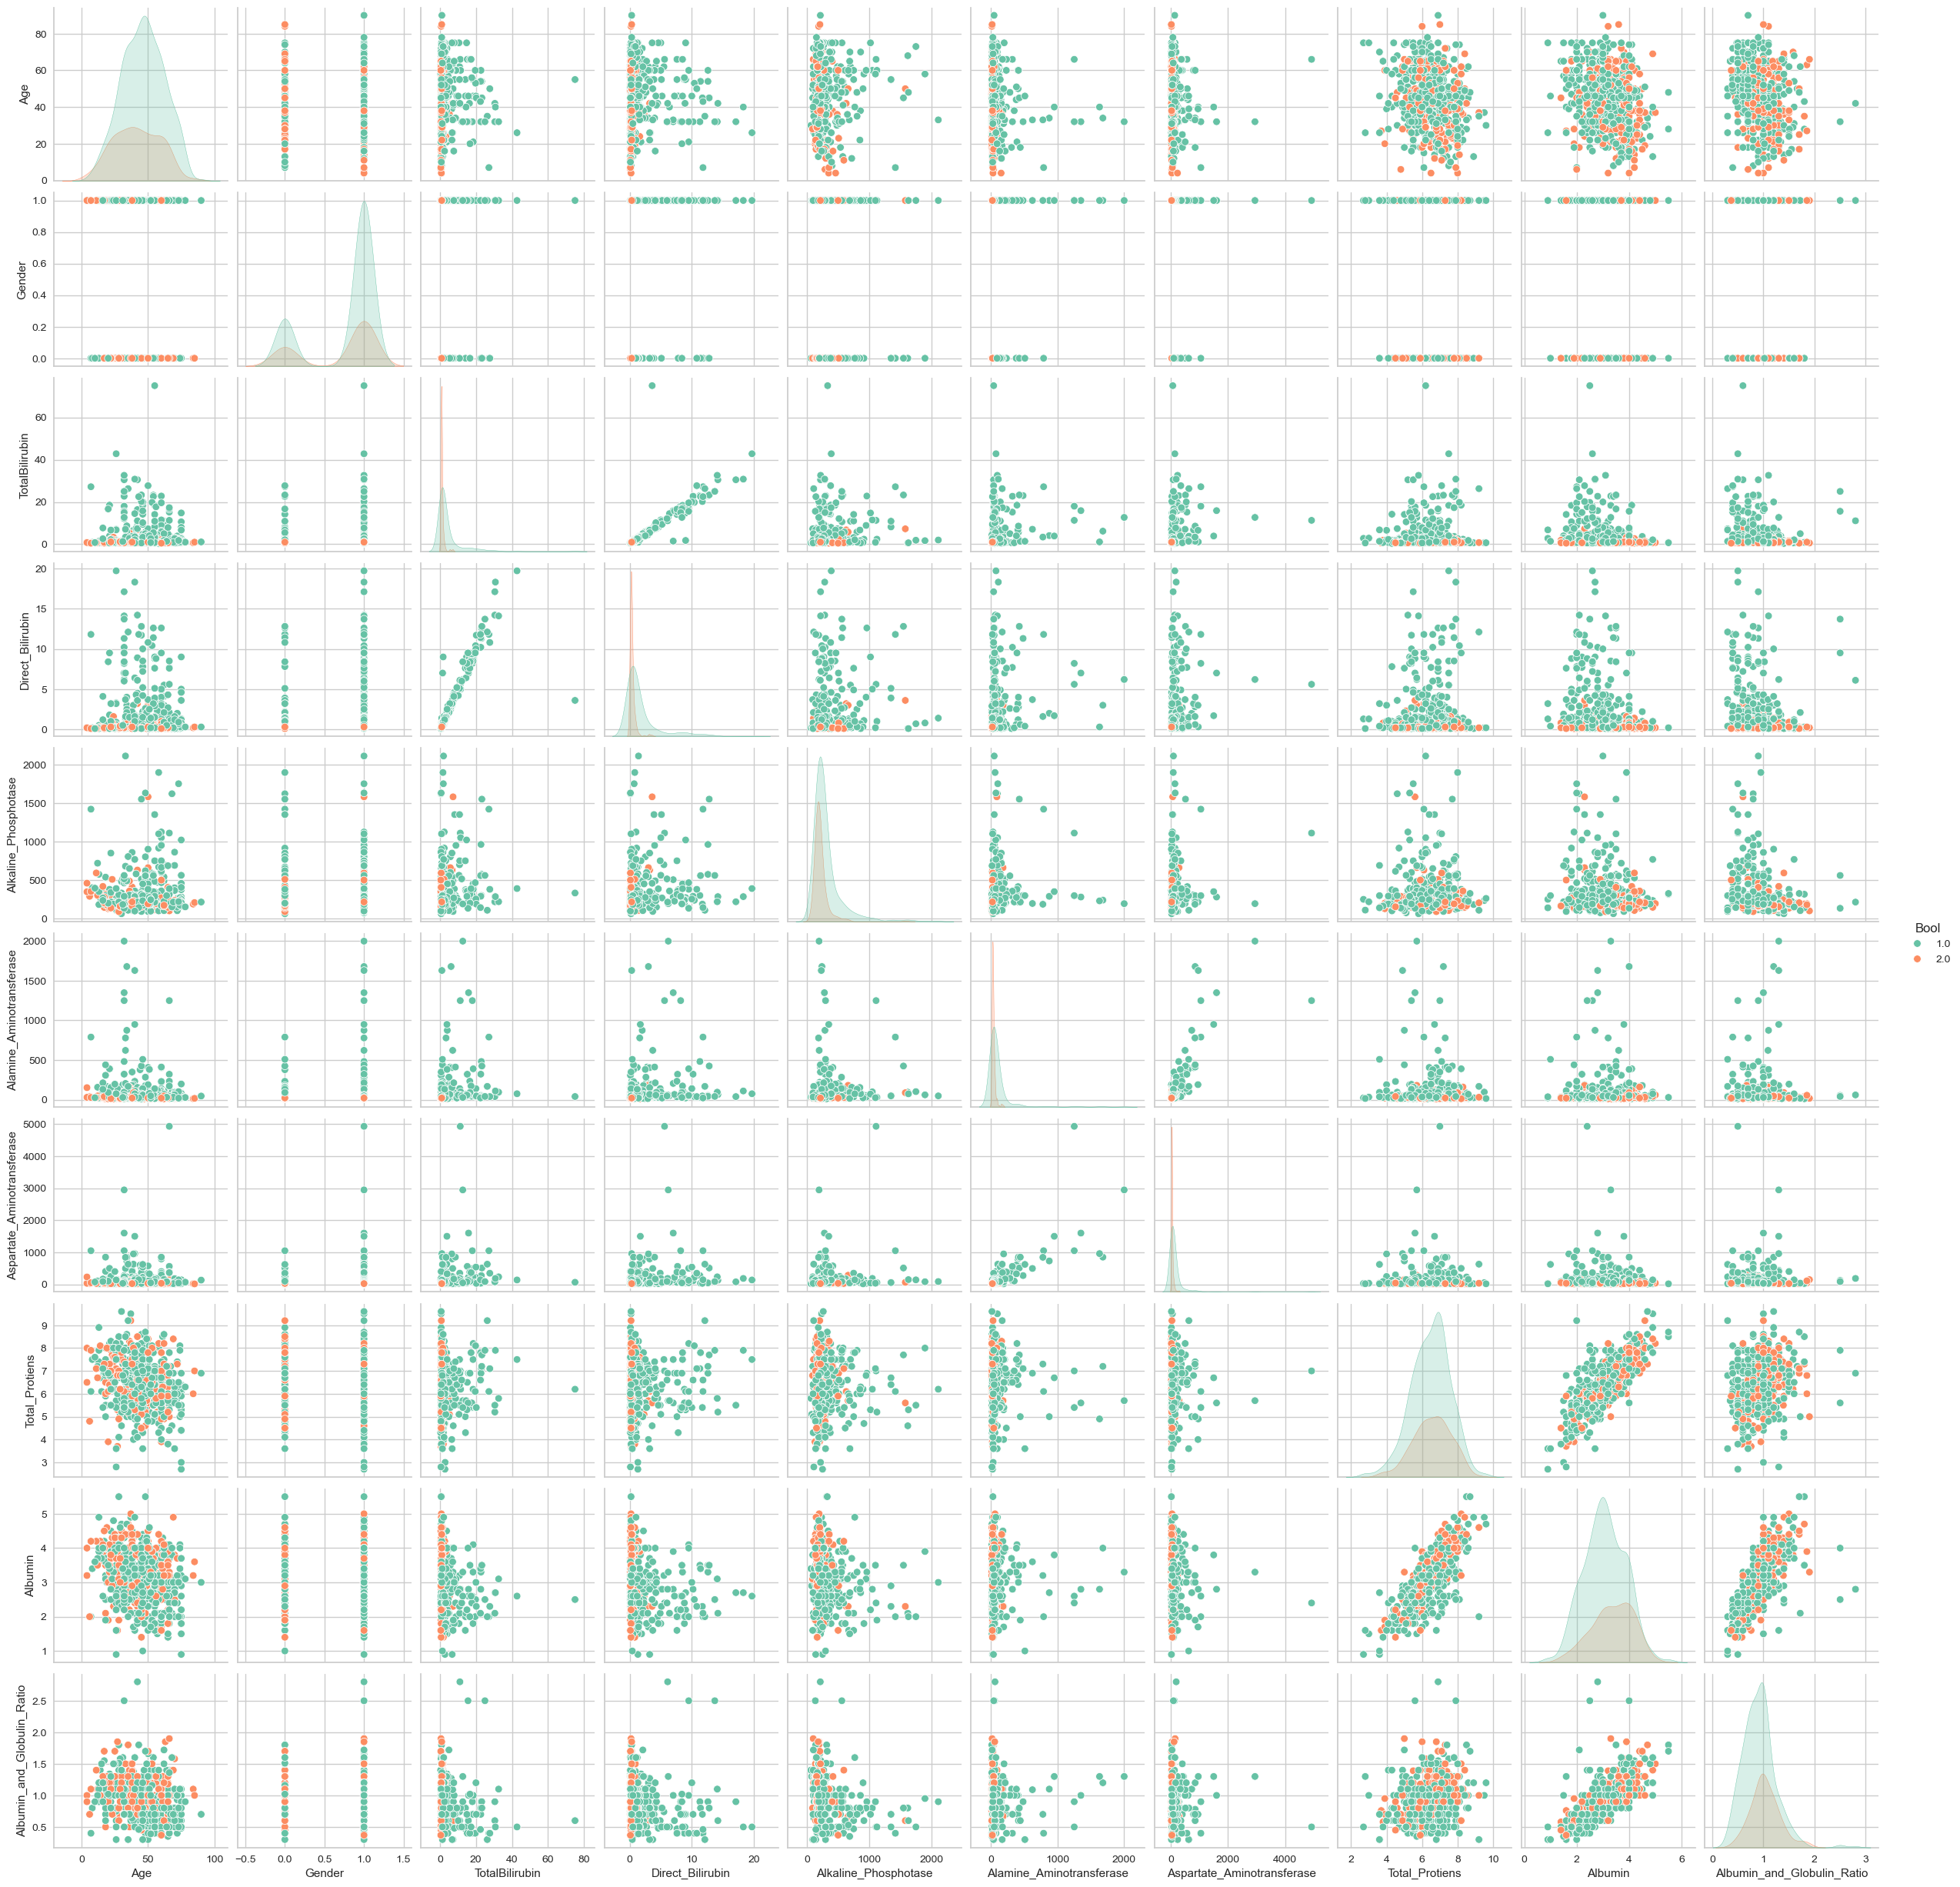

In [15]:
X['Bool'] = y
sns.pairplot(X, hue='Bool', palette='Set2', diag_kind='kde')
plt.show()

Из матрицы можно сделать вывод, что заболеванию подвержены все люди, вне зависимости от пола и возраста, но мужчин значительно больше. Также видна линейная зависимость между некоторыми данными

Стандартизация данных

In [16]:
X_scaled = scaler.fit_transform(X)

### Обучение моделей

Обучение модели, построение "графика локтя"

C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_

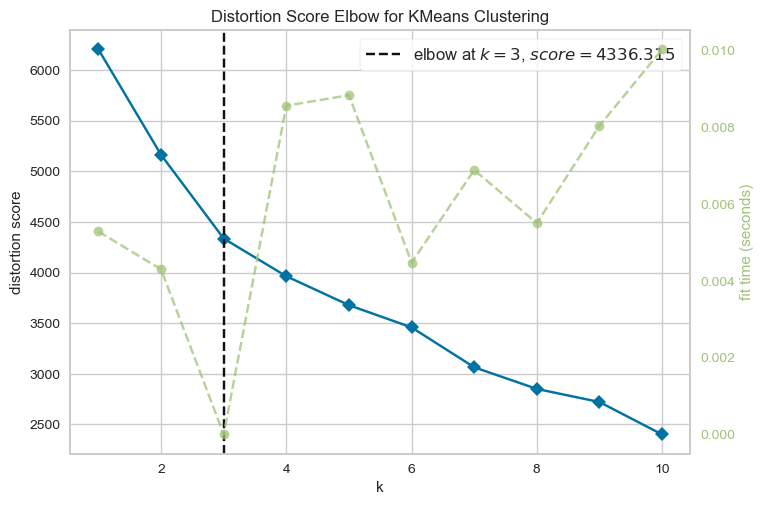

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = KMeans(random_state = 10)
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(X_scaled)
visualizer.show()

Исходя из метода локтя, можно увидеть, что оптимальным количеством кластеров является 3. Применим эту модель на датасете и разобъём данные по кластерам

In [18]:
model = KMeans(n_clusters = 3, random_state = 10)
model = model.fit(X_scaled)
pred = model.predict(X_scaled)

C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Подсчёт метрик

In [19]:
print(f'silhouette: {silhouette_score(X_scaled, model.labels_)}')
print(f'ARI: {adjusted_rand_score(y, pred)}')
print(f'FMI: {fowlkes_mallows_score(y, pred)}')
print(f'Homogenity: {homogeneity_score(y, pred)}')
print(f'Completeness: {completeness_score(y, pred)}')
print(f'V-measure: {v_measure_score(y, pred)}')

silhouette: 0.18662113935271457
ARI: 0.018158491776723563
FMI: 0.511889255360637
Homogenity: 0.10697080705403822
Completeness: 0.0694621081481633
V-measure: 0.08422938270637606


Коэффициент силуэта очень мал, как и другие метрики, что указывает на плохую кластеризацию данных.

In [20]:
df['Cluster'] = model.labels_
df.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0


С помощью метода describe() оценим данные внутри каждого кластера, также подсчитаем средние значения для каждого из показателей

In [21]:
df[df['Cluster'] == 0].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.0
mean,50.955102,0.828571,2.629796,1.222857,347.228571,56.571429,81.800000,5.751020,2.525714,0.774735,1.179592,0.0
std,14.953275,0.377655,2.817126,1.537872,313.774282,61.824978,113.337578,0.932325,0.524982,0.220877,0.384633,0.0
min,6.000000,0.000000,0.400000,0.100000,75.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.0
25%,40.000000,1.000000,0.800000,0.200000,182.000000,24.000000,30.000000,5.200000,2.100000,0.600000,1.000000,0.0
50%,51.000000,1.000000,1.400000,0.600000,230.000000,37.000000,48.000000,5.800000,2.600000,0.800000,1.000000,0.0
75%,61.000000,1.000000,3.000000,1.500000,365.000000,62.000000,88.000000,6.300000,2.900000,0.900000,1.000000,0.0
max,90.000000,1.000000,14.500000,9.000000,2110.000000,509.000000,950.000000,8.000000,3.900000,1.720000,2.000000,0.0


In [22]:
df[df['Cluster'] == 1].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.0
mean,39.683824,0.669118,1.230147,0.486765,225.654412,47.761029,57.724265,7.145221,3.773529,1.134963,1.430147,1.0
std,15.928902,0.471398,1.345970,0.898856,106.737937,54.531668,77.837856,0.761078,0.490084,0.276944,0.496009,0.0
min,4.000000,0.000000,0.500000,0.100000,63.000000,10.000000,11.000000,5.000000,2.800000,0.600000,1.000000,1.0
25%,28.000000,0.000000,0.700000,0.200000,166.500000,21.000000,22.000000,6.700000,3.400000,1.000000,1.000000,1.0
50%,38.500000,1.000000,0.900000,0.200000,194.000000,30.000000,31.000000,7.100000,3.800000,1.100000,1.000000,1.0
75%,50.000000,1.000000,1.200000,0.500000,245.250000,48.000000,57.000000,7.625000,4.100000,1.300000,2.000000,1.0
max,85.000000,1.000000,15.600000,9.500000,805.000000,382.000000,602.000000,9.600000,5.500000,2.800000,2.000000,1.0


In [23]:
df[df['Cluster'] == 2].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.0
mean,43.702128,0.872340,19.285106,8.904255,391.872340,392.319149,560.553191,6.604255,2.772340,0.786170,1.0,2.0
std,14.527208,0.337318,11.989615,4.397082,313.337061,510.321387,845.174379,1.017661,0.588181,0.378197,0.0,0.0
min,7.000000,0.000000,1.100000,0.300000,108.000000,22.000000,32.000000,4.900000,1.800000,0.300000,1.0,2.0
25%,32.000000,1.000000,13.750000,6.600000,223.000000,50.000000,94.500000,5.600000,2.300000,0.500000,1.0,2.0
50%,42.000000,1.000000,18.400000,8.800000,289.000000,119.000000,235.000000,6.800000,2.700000,0.700000,1.0,2.0
75%,55.000000,1.000000,23.100000,11.750000,384.000000,453.500000,762.500000,7.300000,3.250000,0.950000,1.0,2.0
max,75.000000,1.000000,75.000000,19.700000,1550.000000,2000.000000,4929.000000,9.200000,4.100000,2.500000,1.0,2.0


Данные, взятые из интернета:
1. Общий билирубин (Total Bilirubin):
Норма: 0.1 - 1.2 мг/дл
2. Прямой билирубин (Direct Bilirubin):
Норма: 0.0 - 0.3 мг/дл 
3. Щелочная фосфатаза (Alkaline Phosphatase):
Норма: 44 - 147 Ед/л
4. Аламиноаминотрансфераза (Alanine Aminotransferase, ALT):
Норма: 7 - 56 Ед/л
5. Аспартатаминотрансфераза (Aspartate Aminotransferase, AST):
Норма: 10 - 40 Ед/л
6. Общее количество белков (Total Proteins):
Норма: 6.0 - 8.3 г/дл
7. Альбумин (Albumin):
Норма: 3.5 - 5.5 г/дл
8. Соотношение альбуминов и глобулинов (Albumin/Globulin Ratio):
Норма: 1.0 - 2.1

Выводы по кластерам:
- Первый кластер содержит в себе почти только мужской пол, показатели по здоровью очень сильно разнятся, но зачастую они в норме.
- Второй кластер содержит количество мужчин, которое превосходит количество женщин (соотношение мужчин и женщин примерно 2/3). Изходя из завышенных данных, почти все люди содержат заболевание печени.
- Третий кластер тоже является преимущественно мужским, показателю по здоровью есть как и в норме, так и выше нормы


Из кластеров сложно сделать какие-либо выводы т.к. нет никаких знаний в области медицины, также коэффициент силуэта очень низкий (0.18), что говорит о плохой кластеризации данных. 

## На 5
### Кластеризация иерархическим агломеративным методом.

In [24]:
model = AgglomerativeClustering(n_clusters=3)
model.fit(X_scaled)
pred = model.fit_predict(X_scaled)

In [25]:
print(f'silhouette: {silhouette_score(X_scaled, model.labels_)}')
print(f'ARI: {adjusted_rand_score(y, pred)}')
print(f'FMI: {fowlkes_mallows_score(y, pred)}')
print(f'Homogenity: {homogeneity_score(y, pred)}')
print(f'Completeness: {completeness_score(y, pred)}')
print(f'V-measure: {v_measure_score(y, pred)}')

silhouette: 0.13698772392988354
ARI: 0.03484698660790285
FMI: 0.5322056133693219
Homogenity: 0.30019075911290427
Completeness: 0.19596033735119706
V-measure: 0.23712728983047981


Также как и в методе k-means при обучении на 3-х кластерах, все метрики имеют очень маленькие значения, что говорит об отсутсвии связи между кластерами.

In [26]:
df['Cluster_2'] = model.labels_
df.head()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster,Cluster_2
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0,1,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0,0,2
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0,0,2
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0,1,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0,0,2


In [27]:
df[df['Cluster_2'] == 0].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster,Cluster_2
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0
mean,41.903226,0.870968,16.580645,7.843548,350.967742,325.258065,487.112903,6.387097,2.698387,0.820161,1.0,1.516129,0.0
std,12.906612,0.337972,11.659779,4.422062,267.651839,464.773554,758.832648,1.083631,0.625547,0.480664,0.0,0.844305,0.0
min,7.000000,0.000000,1.100000,0.300000,108.000000,21.000000,32.000000,3.600000,1.000000,0.300000,1.0,0.000000,0.0
25%,32.000000,1.000000,8.625000,4.050000,218.250000,46.250000,89.000000,5.600000,2.225000,0.500000,1.0,1.250000,0.0
50%,41.500000,1.000000,15.850000,8.200000,285.000000,85.500000,203.000000,6.450000,2.700000,0.700000,1.0,2.000000,0.0
75%,52.250000,1.000000,22.575000,10.700000,357.500000,412.000000,628.250000,7.100000,3.100000,0.900000,1.0,2.000000,0.0
max,66.000000,1.000000,75.000000,19.700000,1550.000000,2000.000000,4929.000000,9.200000,4.100000,2.800000,1.0,2.000000,0.0


In [28]:
df[df['Cluster_2'] == 1].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster,Cluster_2
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.0
mean,41.454819,0.626506,1.265663,0.494277,225.400602,46.506024,59.084337,6.812349,3.493976,1.047289,1.481928,0.774096,1.0
std,15.706939,0.484462,1.085177,0.698291,106.204325,55.595893,85.068155,1.011892,0.733217,0.277625,0.500428,0.418807,0.0
min,4.000000,0.000000,0.500000,0.100000,63.000000,10.000000,10.000000,3.700000,1.400000,0.370000,1.000000,0.000000,1.0
25%,30.000000,0.000000,0.700000,0.200000,167.750000,21.000000,22.000000,6.200000,3.000000,0.900000,1.000000,1.000000,1.0
50%,42.000000,1.000000,0.800000,0.200000,194.500000,29.000000,31.000000,6.900000,3.600000,1.000000,1.000000,1.000000,1.0
75%,51.000000,1.000000,1.225000,0.500000,245.250000,48.000000,54.000000,7.500000,4.000000,1.200000,2.000000,1.000000,1.0
max,85.000000,1.000000,7.700000,7.000000,850.000000,407.000000,630.000000,9.600000,5.500000,1.900000,2.000000,1.000000,1.0


In [29]:
df[df['Cluster_2'] == 2].describe()

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Bool,Cluster,Cluster_2
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,52.770588,0.964706,2.571176,1.177059,401.611765,56.964706,72.182353,5.912941,2.636471,0.805412,1.005882,0.088235,2.0
std,15.881971,0.185067,2.711545,1.454356,362.486306,44.047969,63.063664,0.989805,0.583875,0.243430,0.076696,0.304566,0.0
min,12.000000,0.000000,0.400000,0.100000,75.000000,12.000000,14.000000,2.700000,0.900000,0.300000,1.000000,0.000000,2.0
25%,44.250000,1.000000,0.800000,0.200000,190.000000,27.000000,32.000000,5.300000,2.225000,0.600000,1.000000,0.000000,2.0
50%,55.000000,1.000000,1.600000,0.700000,258.500000,41.000000,54.000000,6.000000,2.700000,0.800000,1.000000,0.000000,2.0
75%,63.750000,1.000000,2.900000,1.400000,488.000000,73.500000,88.000000,6.575000,3.000000,1.000000,1.000000,0.000000,2.0
max,90.000000,1.000000,14.800000,9.000000,2110.000000,230.000000,400.000000,8.000000,4.000000,1.720000,2.000000,2.000000,2.0


Выводы по кластерам:
- в первом кластере преимущественно находятся только мужчины, показатели здоровья есть как и в норме, так и намного выше её.
- во втором кластере примерно равное количество женщин и мужчин, показатели здоровья средние, но есть и завышенные.
- в третьем кластере мужчин большее количество, есть показатели как в норме, так и выше, ниже
  

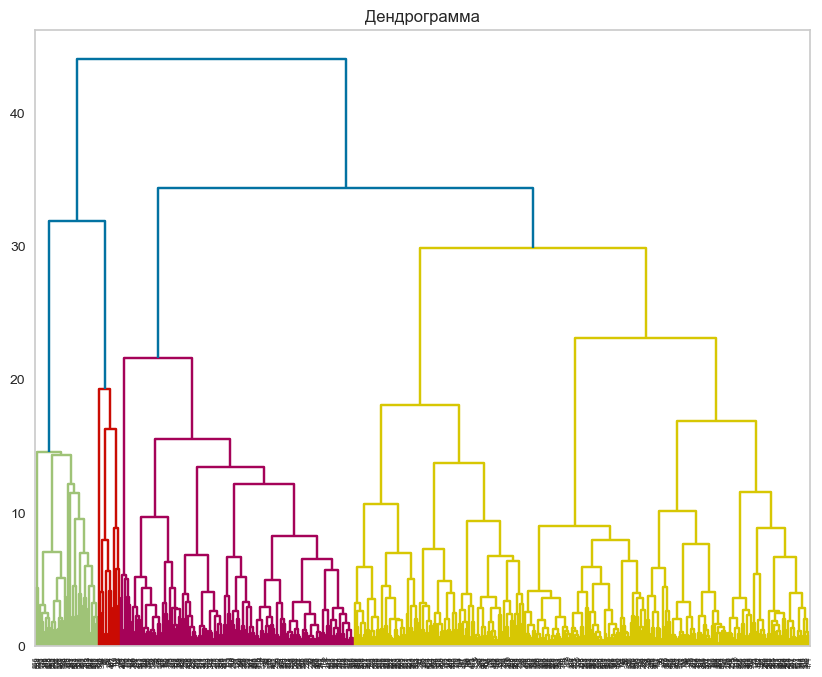

In [30]:
linked = linkage(X_scaled, method = 'ward')

plt.figure(figsize=(10, 8))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.title('Дендрограмма')
plt.show()

Вывод по дендограмме:

Исходя из данной дендограммы, можно предположить, что оптимальным количеством класетров является 3. Это можно предположить, если провести лининию на отметке 20 и будет явно видно группы. Это кластеры с синими, фиолетовыми и жёлтыми ветвям.

# Вывод

В ходе лабораторной работы были изучены методы кластеризации, такие как K-means и Agglomerative Clustering.
Метод обучения K-means выручит в случае, если у нас уже заранее известно примерное количество кластеров.
Метод Agglomerative Clustering удобен на небольших объёмах данных и с неизвестным количеством кластеров, ведь с помощью дендограммы можно их определить оптимальное количество.

Предоставленные для обучения данные являются плохими. Между значениями нет никакой зависимости, это видно из очень низких значениях метрик при двух методах обучения. Также без знания медицины сложно нормально проанализировать эти данные, зато с помощью библиотек их можно удобно интерпритировать для медиков, что позволит им удобно работать с анализами.

Для данной задачи оптимальнее использовать метод Agglomerative Clustering т.к. изначально неизвестно количество кластеров, а с помощью него их можно выявить.

6 доп